# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `Gabriel da Silva Navarro`
### **NUSP**: `13727908`
### **Hash**: `60`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---



## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [ ]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

In [ ]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [ ]:
# Importa a biblioteca pandas para lidar com Dataframes.
import pandas as pd
# Importa o módulo graph_objects da biblioteca plotly para lidar com visualizações gráficas.
import plotly.graph_objects as go
# Importa o módulo pyplot da biblioteca matplotlib para lidar com a visualização de imagens.
import matplotlib.pyplot as plt
# Importa o objeto Optional da biblioteca typing para lidar com tipagens opcionais.
from typing import Optional
# Importa do módulo model_selection da biblioteca sklearn o método train_test_split para separar os dados em treino e teste.
from sklearn.model_selection import train_test_split
# Importa do módulo preprocessing da biblioteca sklearn o objeto MinMaxScaler para normalizar os dados.
from sklearn.preprocessing import MinMaxScaler
# Importa do módulo neural_network da biblioteca sklearn o objeto MLPClassifier para criar a rede neural.
from sklearn.neural_network import MLPClassifier
# Importa do módulo model_selection da biblioteca sklearn o objeto GridSearchCV.
from sklearn.model_selection import GridSearchCV
# Importa do módulo metrics da biblioteca sklearn os métodos classification_report, accuracy_score e confusion_matrix 
# para gerar as métricas de avaliação.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

Descubra o número do Dataset associado ao seu Hash.


In [ ]:
# A variável "y_tot" contém os rótulos (labels) das imagens no Dataset. 
# Sabendo que meu hash é 60, o código abaixo identifica o rótulo do Dataset correspondente ao meu hash.
print(f"O número do Dataset associado ao meu hash é: {y_tot[60]}.")

# Caso eu deseje visualizar a imagem associada ao meu hash no Dataset,
# o código abaixo exibe a imagem correspondente com o rótulo indicado no título.
plt.imshow(X_tot[60], cmap='gray')  # Exibe a imagem em escala de cinza.
plt.title(f"Dígito: {y_tot[60]}")   # Mostra o rótulo da imagem como título.
plt.axis('off')                     # Remove os eixos para uma exibição mais limpa.
plt.show()

## 🔦 Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [ ]:
# Inicializa a variável para contar o número de pixels claros.
bright_pixels_number = 0

# Calcula o total de pixels na imagem (28x28 é a dimensão padrão das imagens do Dataset).
total_pixels_number = 28 * 28

# Itera por cada linha de pixels na imagem associada ao hash (X_tot[60]).
for line in X_tot[60]:
    # Conta os pixels claros (valores >= 128) na linha e adiciona ao total.
    bright_pixels_number += len(line[line >= 128])
    
# Calcula e exibe a probabilidade de um pixel ser claro, formatando o resultado como porcentagem.
print(f"Para a imagem vinculada ao meu Hash, a probabilidade de um pixel claro (128 - 255) \
ocorrer é de aproximadamente {((bright_pixels_number / total_pixels_number) * 100):.2f}%.")

## ♟️ Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [ ]:
# Obtém os índices de todas as imagens no Dataset que pertencem à classe 1 (ou seja, possuem rótulo igual a 1).
same_class_indexes = np.where(y_tot == 1)[0]

# Inicializa a variável para contar o número total de pixels claros.
bright_pixels_number = 0

# Calcula o total de pixels considerando todas as imagens da mesma classe (28x28 pixels por imagem multiplicado pela
# quantidade de imagens na classe).
total_pixels_number = 28 * 28 * len(same_class_indexes)

# Itera por cada índice das imagens pertencentes à classe 1.
for index in same_class_indexes:
    # Recupera a matriz de pixels da imagem correspondente ao índice atual.
    element = X_tot[index]
    # Conta os pixels claros (valores >= 128) na imagem atual e soma ao total acumulado.
    bright_pixels_number += len(element[element >= 128])

# Calcula e exibe a probabilidade de um pixel claro (128 - 255) ocorrer, formatando o resultado como porcentagem.
print(f"Para as imagens vinculadas à classe 1, a probabilidade de um pixel claro (128 - 255) \
ocorrer é de aproximadamente {((bright_pixels_number / total_pixels_number) * 100):.2f}%.")


---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

2. Qual o valor médio dos píxeis de cada dígito?

In [ ]:
# Obtém todos os valores únicos de dígitos (rótulos) presentes no Dataset.
unique_digits = np.unique(y_tot)

# Itera por cada dígito único encontrado no Dataset.
for digit in unique_digits:
    # Obtém os índices das imagens que pertencem ao dígito atual.
    digit_indexes = np.where(y_tot == digit)[0]
    
    # Inicializa a variável para acumular a soma dos valores dos pixels para o dígito atual.
    pixels_sum = 0
    
    # Itera por cada índice associado ao dígito atual.
    for index in digit_indexes:
        # Soma os valores de todos os pixels da imagem atual ao total acumulado.
        pixels_sum += np.sum(X_tot[index])
    
    # Exibe informações sobre o dígito atual.
    print(f"Informações sobre o dígito '{digit}':")
    
    # Calcula o número de imagens no Dataset classificadas como o dígito atual.
    digits_number = len(y_tot[y_tot == digit])
    
    # Exibe a quantidade de dígitos do tipo atual no Dataset.
    print(f"        Existem {digits_number} dígitos '{digit}' no Dataset.")
    
    # Calcula e exibe o valor médio dos pixels das imagens do dígito atual.
    print(f"        O valor médio dos píxeis dos dígitos classificados como '{digit}' é aproximadamente {(pixels_sum) / (digits_number * 28 * 28):.2f}\n")


--------------------------------------------------------------------------

##### ***Resposta 01:***

***O Dataset em questão possui:***

- ***5920 iguais dígitos à '0'.***


- ***6725 iguais dígitos à '1'.***


- ***6023 iguais dígitos à '2'.***


- ***6107 iguais dígitos à '3'.***


- ***5918 iguais dígitos à '4'.***


- ***5376 iguais dígitos à '5'.***
  

- ***5915 iguais dígitos à '6'.***


- ***6238 iguais dígitos à '7'.***


- ***5856 iguais dígitos à '8'.***


- ***5922 iguais dígitos à '9'.***

--------------------------------------------------------------------------

##### ***Resposta 02:***

***Não, os dígitos aparecem em diferentes quantidades.***

--------------------------------------------------------------------------

##### ***Resposta 03:*** 

- ***O valor médio dos píxeis cujos dígitos são classificados como '0' é, aproximadamente: 44.23.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '1' é, aproximadamente: 19.40.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '2' é, aproximadamente: 38.02.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '3' é, aproximadamente: 36.23.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '4' é, aproximadamente: 31.04.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '5' é, aproximadamente: 32.92.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '6' é, aproximadamente: 35.24.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '7' é, aproximadamente: 29.26.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '8' é, aproximadamente: 38.40.***


- ***O valor médio dos píxeis cujos dígitos são classificados como '9' é, aproximadamente: 31.34.***

--------------------------------------------------------------------------

## 📏 Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


In [ ]:
# Cria uma lista onde cada posição `i` contém um array unidimensional com todos os valores de pixels das imagens classificadas como o dígito `i`.
# Por exemplo, o índice 0 armazena um array com os valores de pixels de todas as imagens classificadas como 0. 
results = [X_tot[y_tot == digit].reshape(-1) for digit in np.unique(y_tot)]


# Nota mental: O numpy é eficiente para operações vetorizadas. Portanto, é sempre melhor usar tais operações ao invês de laços explícitos.

In [ ]:
def plot_histogram(data: pd.Series, title: Optional[str] = "", xaxis_title: Optional[str] = "", yaxis_title: Optional[str] = "") -> None:
    '''
        Descrição:
            Essa função plota um histograma a partir do conjunto de dados (pd.Series) recebido como parâmetro.
        Argumentos:
            data (pd.Series): O conjunto de dados a ser visualizado como histograma.
            title (str): Título do histograma. Por padrão, é uma string vazia.
            xaxis_title (str): Rótulo para o eixo x. Por padrão, é uma string vazia.
            yaxis_title (str): Rótulo para o eixo y. Por padrão, é uma string vazia.
        Retorno:
            None: A função gera e exibe o histograma, mas não retorna nenhum valor.
    '''
    
    # Cria um objeto `Figure` para construir o histograma.
    fig = go.Figure(
        # Adiciona os dados ao histograma.
        data=[go.Histogram(
            x=data,     # O eixo x recebe os valores do conjunto de dados (pd.Series) recebido como parâmetro.
            nbinsx=20   # O número de intervalos (bins) é configurado como 20.
        )]
    )

    # Atualiza o layout do plot.
    fig.update_layout(
        # Define o título do plot.
        title=title,
        # Define o rótulo para o eixo x.
        xaxis_title=xaxis_title,
        # Define o rótulo para o eixo y.
        yaxis_title=yaxis_title,
        # Ajusta o espaço entre as barras no histograma.
        bargap=0.1
    )

    # Exibe o histograma.
    fig.show()

In [ ]:
# Para cada dígito único na lista `unique_digits`, gera e exibe um histograma que mostra a distribuição 
# dos valores dos pixels associados a esse dígito.
for digit in unique_digits:
    plot_histogram(results[digit], f"Distribuição dos valores dos píxeis do dígito {digit}", "Valores", "Quantidade")

## 🤓 Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

In [ ]:
def show_images(images: list, images_title: list) -> None:
    '''
    Description:    
        Exibe uma lista de imagens em um único subplot com títulos correspondentes. Cada imagem é exibida com o 
        título correspondente fornecido.
    Args:
        images (list): Lista de imagens para exibição. Cada imagem deve ser uma matriz 2D.
        images_title (list): Lista de títulos para cada imagem. Deve ter o mesmo comprimento que `images`.
    Returns:
        None: Apenas exibe as imagens no subplot e não retorna nenhum valor.
    '''
    
    # Determina o número total de imagens.
    num_images = len(images)

    # Define o número de colunas e calcula o número necessário de linhas.
    cols = 3  # Número de colunas fixo (pode ser ajustado conforme necessário)
    rows = (num_images // cols) + (num_images % cols > 0)  # Adiciona uma linha extra se necessário

    # Criar a figura e os eixos para o grid
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()  # Transforma a matriz de eixos em uma lista para indexação mais simples

    # Itera sobre as imagens e seus respectivos títulos
    for i, (image, title) in enumerate(zip(images, images_title)):
        ax = axes[i]
        ax.imshow(image, cmap="gray")  # Exibe a imagem no eixo atual
        ax.set_title(title)  # Define o título correspondente
        ax.axis('off')  # Remove os eixos para uma exibição mais limpa

    # Desabilita quaisquer subplots restantes (caso não sejam preenchidos)
    for i in range(num_images, len(axes)):
        axes[i].axis('off')

    # Ajusta o layout para evitar sobreposições
    plt.tight_layout()
    plt.show()


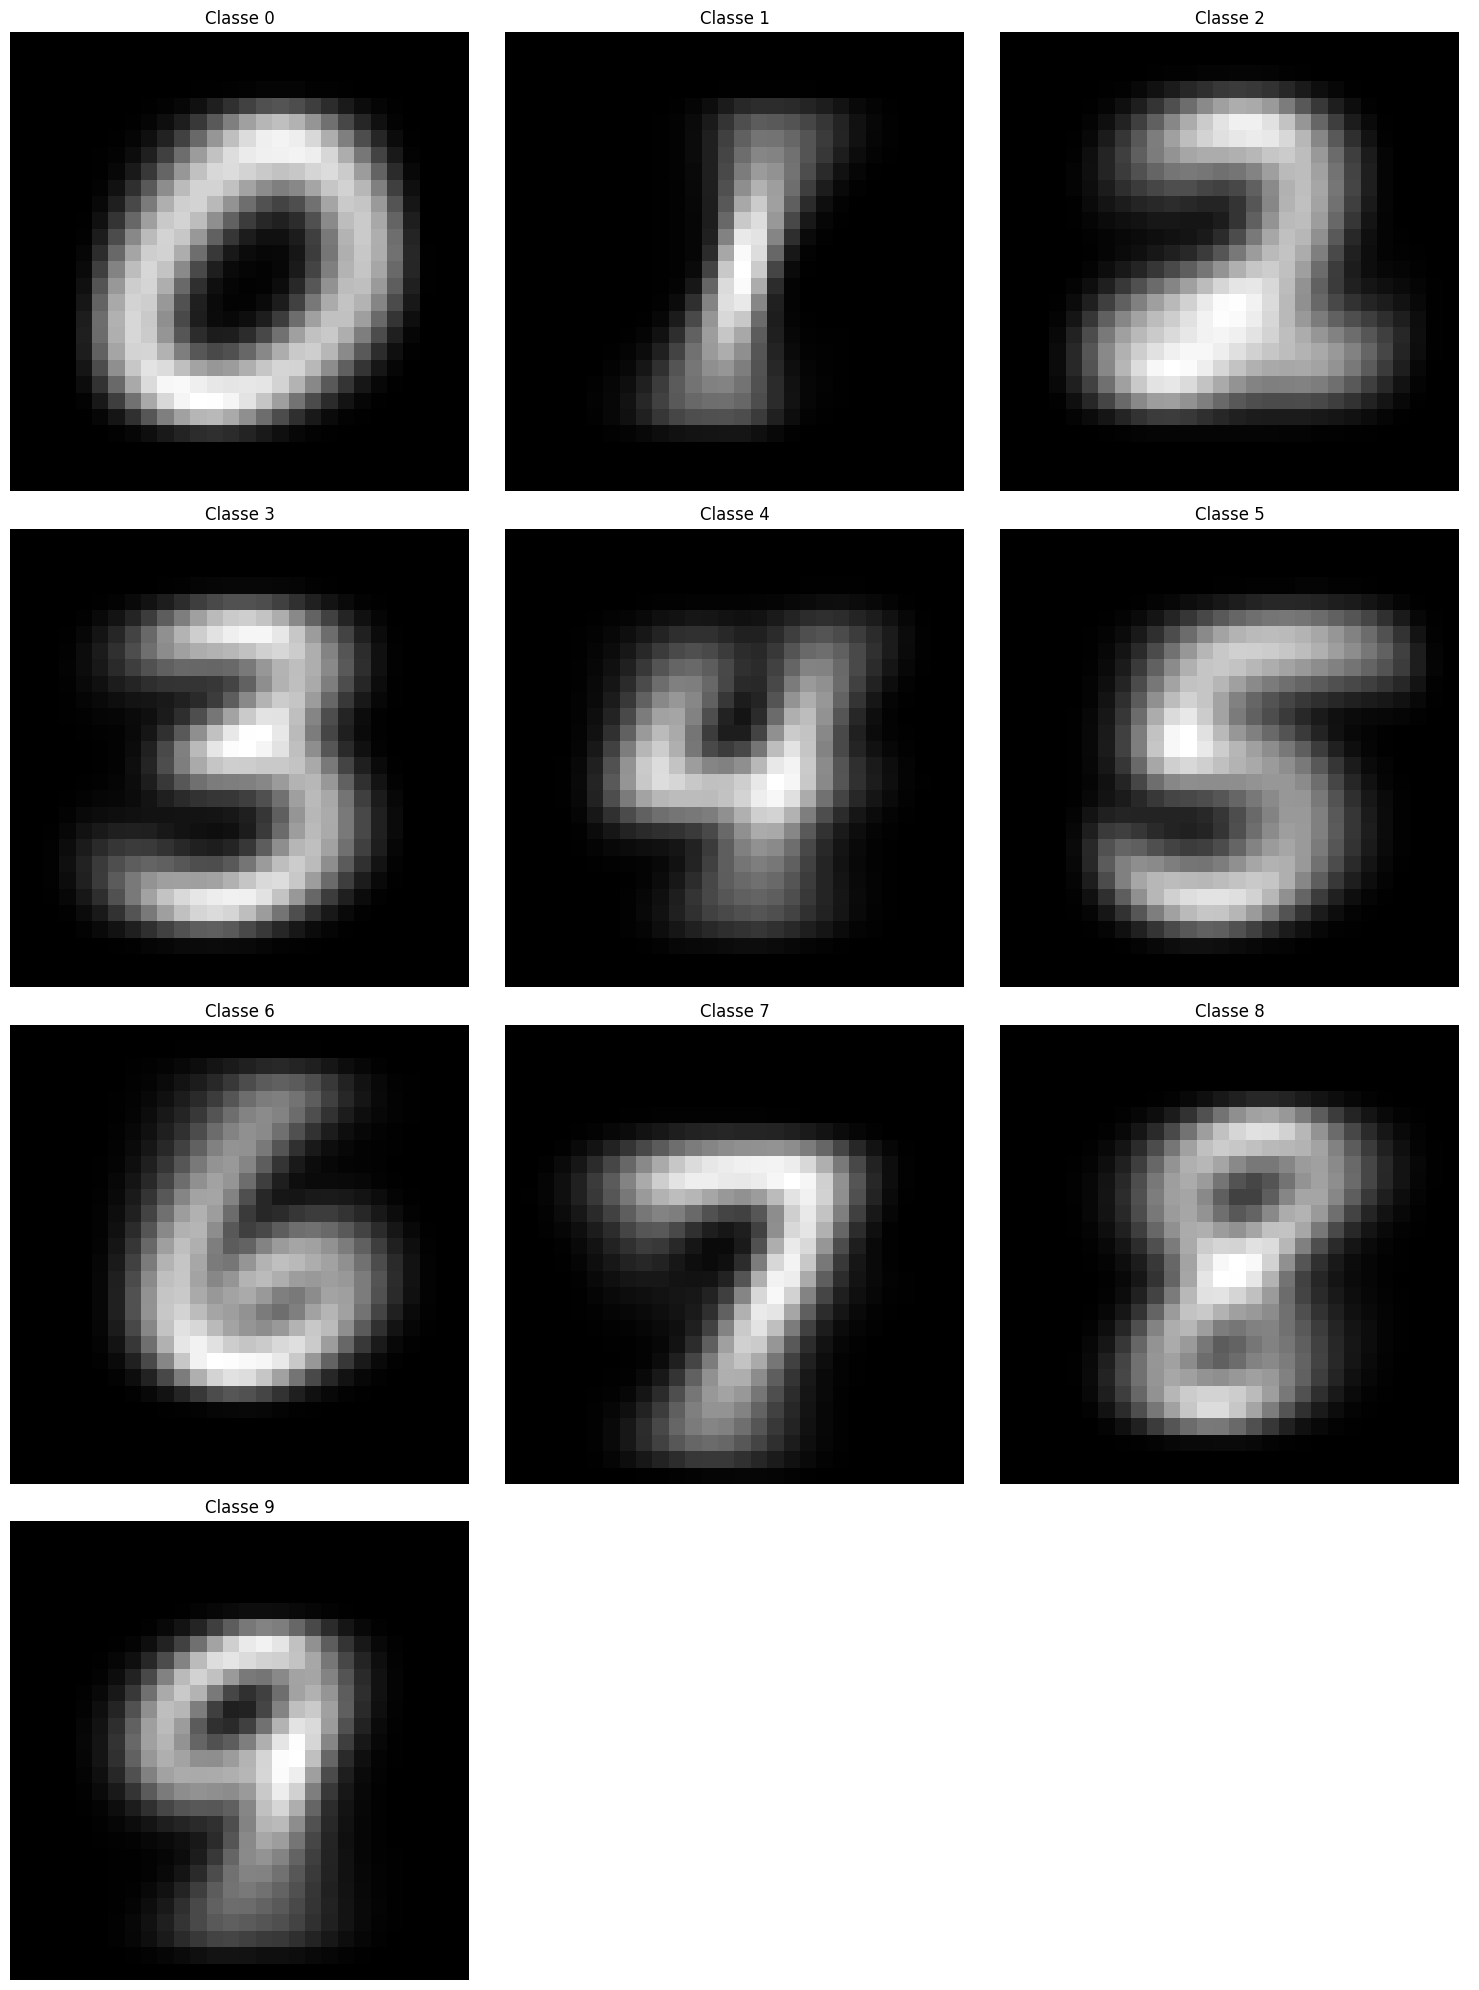

In [85]:
# Inicializa uma lista para armazenar as imagens representativas de cada dígito.
images = []

# Itera sobre todos os dígitos únicos presentes no conjunto de dados.
for digit in unique_digits:
    # Seleciona todas as imagens pertencentes à classe atual e as remodela para formato bidimensional.
    reshaped_class = X_tot[y_tot == digit].reshape(X_tot[y_tot == digit].shape[0], -1)
    # Calcula a "imagem média" da classe atual somando todos os pixels e dividindo pelo número de imagens.
    images.append((np.sum(reshaped_class, axis=0)//reshaped_class.shape[0]).reshape(28, -1))
    
# Cria os títulos para cada imagem representando a respectiva classe.
images_title = [f'Classe {digit}' for digit in unique_digits]

# Exibe as imagens médias de cada classe, com os títulos indicativos.
show_images(images, images_title)

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

In [ ]:
# Cria cópias dos arrays X_tot e y_tot e os atribui a X e y, respectivamente, para garantir que as variáveis originais não sejam modificadas
# durante o processamento.
X, y = np.copy(X_tot), np.copy(y_tot)

In [ ]:
# Divide os dados em conjuntos de treinamento (80%) e teste (20%) de forma aleatória.
# X e y são as features e rótulos, respectivamente. A semente random_state=10 garante reprodutibilidade dos resultados.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# Redimensiona o conjunto de dados de treinamento (X_train) para transformá-lo em um array 2D. Originalmente, cada imagem no MNIST 
# tem forma 28x28 (uma matriz 2D).  O método reshape altera essa forma para um vetor unidimensional (1D) com 28*28 = 784 elementos. O parâmetro 
# `-1` calcula automaticamente o número de colunas necessárias, preservando o número de amostras (linhas).
X_train = X_train.reshape(X_train.shape[0], -1)

# Redimensiona o conjunto de dados de teste (X_test) da mesma maneira que o conjunto de treinamento.
# Isso garante que os dados de entrada estejam no mesmo formato (vetores 1D com 784 elementos por exemplo).
X_test = X_test.reshape(X_test.shape[0], -1)

# Observação:
# Esse redimensionamento é necessário porque muitos modelos de machine learning, como redes neurais ou classificadores do scikit-learn,
# esperam dados em forma de vetores 1D, em vez de matrizes 2D ou imagens estruturadas.

In [ ]:
# Cria o objeto MinMaxScaler, que normaliza os dados para a faixa [0, 1].
scaler = MinMaxScaler()

# Aplica a normalização nos dados de treinamento, ajustando o scaler aos dados e transformando-os.
X_train = scaler.fit_transform(X_train)

# Aplica a normalização nos dados de teste, utilizando os parâmetros calculados a partir dos dados de treinamento.
X_test = scaler.transform(X_test)

In [ ]:
# Cria o primeiro modelo de rede neural, usando o MLPClassifier (MultiLayer Perceptron Classifier) do scikit-learn para tal.
mlp_1 = MLPClassifier(
    hidden_layer_sizes=(8, 8),  # Define duas camadas ocultas (hidden layers), cada uma com 8 neurônios.
    activation='relu',          # Define a função de ativação como ReLU (Rectified Linear Unit).
    solver='adam',              # Utiliza o otimizador Adam para ajustar os pesos durante o treinamento.
    max_iter=10,                # Define o número máximo de iterações do otimizador (similar ao número de épocas em outros frameworks).
    validation_fraction=0.1,    # Reserva 10% dos dados de treinamento para validação durante o treinamento.
    early_stopping=True,        # Interrompe o treinamento se a pontuação no conjunto de validação não melhorar por um número consecutivo de iterações (paciência padrão = 10).
    random_state=10             # Define a semente para reprodutibilidade dos resultados, garantindo que os pesos iniciais e a divisão de validação sejam consistentes entre execuções.
)

# Treina o modelo com os dados de treino.
mlp_1.fit(X_train, y_train) 

# Observações: 
# 1. A input layer já é automaticamente configurada dentro do MLPClassifier como sendo o número total 
#    de features (atributos) no conjunto de dados de entrada. Ou seja, o número de neurônios na camada de entrada
#    será igual ao número de colunas (features) em X_train, que é 784 (28 x 28).
# 2. A função de saída padrão do MLPClassifier para problemas de classificação multiclasse é a 
#    função softmax. Ela gera uma probabilidade para cada classe, e a classe com a maior probabilidade 
#    é escolhida como a previsão.

In [ ]:
# Realiza as previsões usando a ANN1.
y_pred_1 = mlp_1.predict(X_test)

## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [ ]:
# Cria o segundo modelo de rede neural, usando o MLPClassifier (MultiLayer Perceptron Classifier) do scikit-learn para tal.
mlp_2 = MLPClassifier(
    hidden_layer_sizes=(256, 256, 256, 256),  # Define quatro camadas ocultas (hidden layers), cada uma com 256 neurônios.
    activation='relu',                        # Define a função de ativação como ReLU (Rectified Linear Unit).
    solver='adam',                            # Utiliza o otimizador Adam para ajustar os pesos durante o treinamento.
    max_iter=20,                              # Define o número máximo de iterações do otimizador (similar ao número de épocas em outros frameworks).
    validation_fraction=0.1,                  # Reserva 10% dos dados de treinamento para validação durante o treinamento.
    early_stopping=True,                      # Interrompe o treinamento se a pontuação no conjunto de validação não melhorar por um número consecutivo de iterações (paciência padrão = 10).
    random_state=10                           # Define a semente para reprodutibilidade dos resultados, garantindo que os pesos iniciais e a divisão de validação sejam consistentes entre execuções.
)

# Treina o modelo com os dados de treino.
mlp_2.fit(X_train, y_train) 

# Observações: 
# 1. A input layer já é automaticamente configurada dentro do MLPClassifier como sendo o número total 
#    de features (atributos) no conjunto de dados de entrada. Ou seja, o número de neurônios na camada de entrada
#    será igual ao número de colunas (features) em X_train, que é 784 (28 x 28).
# 2. A função de saída padrão do MLPClassifier para problemas de classificação multiclasse é a 
#    função softmax. Ela gera uma probabilidade para cada classe, e a classe com a maior probabilidade 
#    é escolhida como a previsão.

In [ ]:
# Realiza as previsões usando a ANN2.
y_pred_2 = mlp_2.predict(X_test)

## ⚙️ Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

In [ ]:
'''
# Define o modelo base (MLPClassifier - MultiLayer Perceptron Classifier) a ser usado no GridSearchCV.
mlp = MLPClassifier(random_state=10, early_stopping=True)

# Define os parâmetros para a busca em grade.
param_grid = {
    'hidden_layer_sizes': [(8, 8), (64, 64, 64), (128,128,128), (256, 256, 256, 256)],  # Define os conjuntos de camadas que serão testados.
    'activation': ['relu'],                                                             # Define as funções de ativação que serão testadas. 
    'solver': ['adam'],                                                                 # Define os otimizadores que serão testados.
    'max_iter': [10, 50, 100, 200],                                                     # Define os números de iterações (épocas) que serão testados.
}

# Cria uma instância do GridSearchCV usando as variáveis definidas acima.
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Treina o modelo usando GridSearchCV, visando encontrar a melhor combinação dentre as 
# possíveis configurações de hiperparâmetros definidas na variável `param_grid`.
grid_search.fit(X_train, y_train)
'''


In [ ]:
'''
# Exibe os melhores hiperparâmetros encontrados.
print("Melhores hiperparâmetros encontrados: ", grid_search.best_params_)

print()

# Exibe a acurácia do modelo com os melhores hiperparâmetros.
print("Acurácia do modelo com os melhores hiperparâmetros (no conjunto de teste): ", grid_search.score(X_test, y_test))
'''

*Note que o modelo com os hiperparâmetros otimizados pelo GridSearchCV apresenta uma acurácia ligeiramente superior à do segundo modelo (ANN2). Considerando que ambos possuem a mesma configuração de camadas e diferem apenas no número de épocas, faz sentido classificar o modelo ajustado pelo GridSearchCV como o melhor entre os dois, devido ao seu desempenho ligeiramente superior.*

In [ ]:
# Cria o modelo de rede neural utilizando o MLPClassifier (Multi-Layer Perceptron Classifier) do scikit-learn, 
# configurado com os melhores hiperparâmetros  obtidos através da busca exaustiva realizada pelo GridSearchCV.
best_mlp = MLPClassifier(
    hidden_layer_sizes=(256, 256, 256, 256),  # Define quatro camadas ocultas (hidden layers), cada uma com 256 neurônios.
    activation='relu',                        # Define a função de ativação como ReLU (Rectified Linear Unit).
    solver='adam',                            # Utiliza o otimizador Adam para ajustar os pesos durante o treinamento.
    max_iter=50,                              # Define o número máximo de iterações do otimizador (similar ao número de épocas em outros frameworks).
    validation_fraction=0.1,                  # Reserva 10% dos dados de treinamento para validação durante o treinamento.
    early_stopping=True,                      # Interrompe o treinamento se a pontuação no conjunto de validação não melhorar por um número consecutivo de iterações (paciência padrão = 10).
    random_state=10                           # Define a semente para reprodutibilidade dos resultados, garantindo que os pesos iniciais e a divisão de validação sejam consistentes entre execuções.
)

# Treina o modelo com os dados de treino.
best_mlp.fit(X_train,y_train)

In [ ]:
# Realiza as previsões usando a melhor ANN encontrada.
best_y_pred = best_mlp.predict(X_test)

## 🔧 Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


#### *Comparando o desempenho dos modelos*

In [ ]:
# Calcula e exibe a acurácia do modelo ANN1 utilizando as predições y_pred_1.
accuracy_1 = accuracy_score(y_test, y_pred_1)
print(f"Acurácia da ANN1: {accuracy_1}\n")

# Calcula e exibe a acurácia do modelo ANN2 utilizando as predições y_pred_2.
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f"Acurácia da ANN2: {accuracy_2}\n")

# Calcula e exibe a acurácia do melhor modelo de rede neural encontrado.
best_accuracy = accuracy_score(y_test, best_y_pred)
print(f"Acurácia da melhor ANN encontrada: {best_accuracy}\n")

*Com base nas acurácias obtidas, podemos comparar o desempenho dos modelos da seguinte maneira:*

*- **ANN1 (~ 0.9098 accuracy):** Obteve uma acurácia de aproximadamente 91%, o que indica um desempenho bom, porém inferior aos outros modelos testados.*

*- **ANN2 (~ 0.9784 accuracy):** Apresentou uma melhoria significativa, com acurácia de 97,8%. Essa melhoria sugere que o aumento no número de camadas, neurônios por camada e épocas contribuiu para uma maior eficiência na tarefa de classificação.*

*- **Melhor ANN Encontrada (~ 0.9822 accuracy):** Com uma acurácia de 98,2%, este modelo superou os outros, indicando que o ajuste fino dos hiperparâmetros via GridSearchCV (como o aumento de 20 para 50 épocas) otimizou ainda mais seu desempenho, tornando-o o mais preciso dos três.*

In [ ]:
# Printa um relatório detalhado dos resultados da classificação feita pela ANN1.
print(classification_report(y_test, y_pred_1))

In [ ]:
# Printa um relatório detalhado dos resultados da classificação feita pela ANN2.
print(classification_report(y_test, y_pred_2))

In [59]:
# Printa um relatório detalhado dos resultados da classificação feita pela melhor ANN encontrada.
print(classification_report(y_test, best_y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1189
           1       0.99      0.99      0.99      1386
           2       0.98      0.99      0.98      1232
           3       0.98      0.98      0.98      1228
           4       0.99      0.98      0.98      1143
           5       0.98      0.98      0.98      1116
           6       0.98      0.99      0.98      1158
           7       0.98      0.99      0.98      1268
           8       0.98      0.97      0.98      1142
           9       0.98      0.97      0.97      1138

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



***ANN1 - MLP com 2 Camadas Ocultas (8 neurônios por camada + 10 epochs):***

*O primeiro modelo, utilizando um MLPClassifier com duas camadas ocultas de 8 neurônios cada, apresentou um desempenho geral bom, com uma acurácia de 91%. As classes 0 e 1 obtiveram os melhores resultados, com precisão e recall superiores a 0,95. Por outro lado, as classes 5 e 8 tiveram o pior desempenho, com ambos os indicadores em torno de 0,87. As demais classes apresentaram resultados um pouco mais consistentes, com valores de precisão e recall variando entre 0,88 e 0,93.*

***ANN2 - MLP com 4 Camadas Ocultas (256 neurônios por camada + 20 epochs):***

*O segundo modelo, utilizando um MLPClassifier com quatro camadas ocultas de 256 neurônios cada, apresentou um desempenho significativamente superior ao primeiro. A acurácia aumentou para 98%, enquanto o recall e o F1-score também atingiram 0,98. A maioria das classes registrou valores de precisão e recall próximos a 0,98, com exceção das classes 8 e 9, que, embora ainda ligeiramente inferiores, exibiram melhorias substanciais em relação ao primeiro modelo.*

***Melhor ANN encontrada - MLP com 4 Camadas Ocultas (256 neurônios por camada + 50 epochs):***

*O terceiro modelo é uma versão do MLPClassifier com a mesma arquitetura do segundo modelo (quatro camadas ocultas de 256 neurônios), mas treinado com um número maior de épocas. Esse modelo alcançou uma acurácia de 98%, apresentando desempenho quase idêntico ao segundo, porém com pequenas melhorias nos índices de precisão e recall para as classes 8 e 9.*

*Em resumo, o terceiro modelo, com uma arquitetura maior e mais épocas de treinamento, apresentou um salto significativo em desempenho em relação ao primeiro modelo e uma leve vantagem sobre o segundo, consolidando-se como o melhor entre os três. O segundo modelo, por sua vez, também mostrou uma grande melhora em comparação ao primeiro, que, apesar de ser o menos eficiente, ainda alcançou mais de 90% de acurácia e pode ser considerado satisfatório.*

#### *Analisando se os modelos apresentam underfitting ou overfitting*

In [ ]:
def plot_multiples_time_series_line_graphs(data_list: list, serie_title: Optional[str] = "", serie_xaxis_title: Optional[str] = "", 
                               serie_yaxis_title: Optional[str] = "", annotation_text: Optional[str] = "") -> None:
    '''
        Description:
            Esta função exibe em um mesmo plot múltiplos gráficos de séries temporais. 
        Args:
            data_list (list): Lista contendo as séries temporais cujos gráficos serão exibidos no plot. Os valores de tais séries temporais
                              estarão no eixo y, enquanto os índices dessas séries estarão no eixo x.
            title (string) [Optional]: Título do plot.
            xaxis_title (string) [Optional]: Título do eixo x do plot.
            yaxis_title (string) [Optional]: Título do eixo y do plot.
        Return:
            None: A função exibe os gráficos, mas não retorna nenhum valor.  
        Errors:
            TypeError: É esperado que todas os elementos da lista "data_list" sejam objetos do tipo pd.Series, isto é, que sejam séries temporais.
            ValueError: É esperado que todas as séries temporais presentes na variável "data_list" possuam os mesmos índices. 
            TypeError: É esperado que todas as séries temporais presentes na variável data_list possuam um atributo "name".
    '''    

    # Verifica se todos os elementos presentes na lista "data_list" são séries temporais.
    are_all_data_time_series = all(isinstance(df, pd.Series) for df in data_list)
    
    # Retorna um erro caso algum dos dados presentes na variável "data_list" não seja uma série temporal
    if not are_all_data_time_series:
        raise TypeError("Todos os dados presentes no parâmetro 'data_list' devem ser séries temporais.")
    
    # Verifica se as séries temporais presentes na variável "data_list" possuem os mesmos índices.
    are_all_index_equal = all(df.index.equals(data_list[0].index) for df in data_list)
    
    # Retorna um erro caso as séries temporais possuam índices diferentes.
    if not are_all_index_equal:
        raise ValueError("Todos as séries temporais devem possuir os mesmos índices.")
    
    # Verifica se todas as séries temporais presentes na variável "data_list" possuem o atributo "name".
    all_time_series_have_names = all(hasattr(df,"name") for df in data_list)
    
    # Retorna um erro caso uma das séries temporais presentes na variável "data_list" não possua o atributo "name".
    if not all_time_series_have_names:
        raise TypeError("Todas as séries temporais devem possuir o atributo 'name'")
    
    # Cria uma lista de timestamps que representará o eixo x do gráfico que será plotado.
    x_axis = data_list[0].index.tolist() # Observe que só podemos fazer isso pois temos certeza que todas as séries temporais possuem os mesmos índices.
    # Cria a figura onde será plotado o gráfico.
    fig = go.Figure()

    # Adiciona cada série temporal ao gráfico.
    for time_serie in data_list:
        # Plota o gráfico (Data x Valor da Ação) do ticker em questão.
        fig.add_trace(go.Scatter(x=x_axis, y=time_serie.values, mode="lines", name=time_serie.name))
    
    # Adiciona a anotação ao gráfico
    fig.add_annotation(
        x=1, y=1, 
        text=annotation_text, 
        showarrow=False, 
        font=dict(size=12, color="black"), 
        align="center", 
        xref="paper", yref="paper", 
        bgcolor="white", opacity=0.7
    )
    
    # Atualiza o layout para permitir destaque ao clicar na legenda.
    fig.update_layout(
        # Seta um título para o plot.
        title=serie_title,
        # Seta um título para o eixo x do plot.
        xaxis_title=serie_xaxis_title,
        # Seta um título para o eixo y do plot.
        yaxis_title=serie_yaxis_title  
    )

    # Exibe o gráfico criado.
    fig.show()

In [ ]:
# Converte a curva de perda do modelo MLP 1 para um objeto Pd.Series e o nomeia como "MLP 1 Loss Curve"
mlp_1_loss_curve_values = pd.Series(mlp_1.loss_curve_)
mlp_1_loss_curve_values.name = "MLP 1 Loss Curve"

# Converte as pontuações de validação do modelo MLP 1 para um objeto Pd.Series e o nomeia como "MLP 1 Validation Scores"
mlp_1_validation_scores = pd.Series(mlp_1.validation_scores_)
mlp_1_validation_scores.name = "MLP 1 Validation Scores"

# Converte a curva de perda do modelo MLP 2 para um objeto Pd.Series e o nomeia como "MLP 2 Loss Curve"
mlp_2_loss_curve_values = pd.Series(mlp_2.loss_curve_)
mlp_2_loss_curve_values.name = "MLP 2 Loss Curve"

# Converte as pontuações de validação do modelo MLP 2 para um objeto Pd.Series e o nomeia como "MLP 2 Validation Scores"
mlp_2_validation_scores = pd.Series(mlp_2.validation_scores_)
mlp_2_validation_scores.name = "MLP 2 Validation Scores"

# Converte a curva de perda do melhor modelo MLP encontrado para um objeto Pd.Series e o nomeia como "Best MLP Loss Curve"
best_mlp_loss_curve_values = pd.Series(best_mlp.loss_curve_)
best_mlp_loss_curve_values.name = "Best MLP Loss Curve"

# Converte as pontuações de validação do melhor modelo MLP encontrado para um objeto Pd.Series e o nomeia como "Best MLP Validation Scores"
best_mlp_validation_scores = pd.Series(best_mlp.validation_scores_)
best_mlp_validation_scores.name = "Best MLP Validation Scores"

In [ ]:
# Esta função plota duas séries temporais (curva de perda e pontuação de validação) para o modelo MLP 1, de modo a podermos visualizar
# o desempenho desse modelo ao longo das épocas. O eixo X representa as épocas e o eixo Y mostra os valores correspondentes de perda e 
# pontuação de validação.
plot_multiples_time_series_line_graphs([mlp_1_loss_curve_values, mlp_1_validation_scores], "Loss Curve vs Validation Scores for the MLP 1", "Epoch", "Value")

*De ínicio, observe a saída da célula abaixo:*

In [ ]:
# Calcula a variação percentual na curva de perda entre a época 5 e a última época
loss_curve_1_pct_change = ((mlp_1_loss_curve_values[5] - mlp_1_loss_curve_values[len(mlp_1_loss_curve_values) - 1]) / mlp_1_loss_curve_values[5]) * 100

# Calcula a variação percentual na pontuação de validação (acurácia) entre a época 5 e a última época
validation_scores_1_pct_change = ((mlp_1_validation_scores[5] - mlp_1_validation_scores[len(mlp_1_validation_scores) - 1]) / mlp_1_validation_scores[5]) * 100

# Exibe a queda percentual na curva de perda entre a época 5 e a última época
print(f"Entre a época 5 e a época {len(mlp_1_loss_curve_values)-1} houve uma queda de {loss_curve_1_pct_change:.2f}% na curva de perda.\n")

# Exibe o aumento percentual na acurácia entre a época 5 e a última época (o sinal negativo é invertido para apresentar um aumento positivo)
print(f"Entre a época 5 e a época {len(mlp_1_validation_scores)-1} houve um aumento de {-validation_scores_1_pct_change:.2f}% na acurácia.")

*Com base na saída da célula acima e no gráfico apresentado para esse modelo, podemos concluir que a redução da função de perda (Loss Curve)não está acompanhada por um ganho proporcional na acurácia (Validation Scores). Esse desalinhamento sugere que o modelo pode estar subajustado (underfitting), indicando que ele está capturando apenas uma parte dos padrões presentes nos dados, o que limita sua capacidade de melhorar significativamente a acurácia.*

In [ ]:
# Esta função plota duas séries temporais (curva de perda e pontuação de validação) para o modelo MLP 2, de modo a podermos visualizar
# o desempenho desse modelo ao longo das épocas. O eixo X representa as épocas e o eixo Y mostra os valores correspondentes de perda e 
# pontuação de validação.
plot_multiples_time_series_line_graphs([mlp_2_loss_curve_values, mlp_2_validation_scores], "Loss Curve vs Validation Scores for the MLP 2", "Epoch", "Value")

*Com base no gráfico apresentado para o Modelo 2, podemos observar que a função de perda diminui de forma consistente ao longo do treinamento, estabilizando-se em valores baixos, enquanto a acurácia aumenta gradualmente (se aproximando cada vez mais de seu valor limite), o que sugere que o modelo está generalizando bem para dados não vistos. Além disso, não há uma diferença significativa entre o comportamento das curvas apresentadas. Tais fatores indicam que o modelo não está apresentando sinais de overfitting ou underfitting.*

In [ ]:
# Esta função plota duas séries temporais (curva de perda e pontuação de validação) para o melhor modelo MLP, de modo a podermos visualizar
# o desempenho desse modelo ao longo das épocas. O eixo X representa as épocas e o eixo Y mostra os valores correspondentes de perda e 
# pontuação de validação.
plot_multiples_time_series_line_graphs([best_mlp_loss_curve_values, best_mlp_validation_scores], "Loss Curve vs Validation Scores for the Best MLP", "Epoch", "Value")

*O gráfico acima é bastante semelhante ao apresentado para o Modelo 2, pois as duas redes possuem configurações idênticas, com a única diferença sendo o número de épocas, o que faz o Modelo 3 apresentar um desempenho ligeiramente superior em termos de acurácia. De forma mais específica, podemos observar que o pequeno aumento na acurácia do terceiro modelo, em comparação ao segundo, é acompanhado por uma redução na função de perda. Além disso, assim como no Modelo 2, não há diferença significativa no comportamento das duas curvas apresentadas. Tais fatores indicam que o Modelo 3 também não apresenta sinais de overfitting ou underfitting, tal como o modelo 2.*

---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

In [ ]:
# Gera a matriz de confusão comparando os rótulos verdadeiros (y_test) com as previsões do modelo (best_y_pred).
conf_matrix = confusion_matrix(y_test, best_y_pred)

# Exibe a matriz de confusão gerada acima.
conf_matrix

In [ ]:
# Será criado um mapa de calor junto da matriz de confusão para melhorar a visualização da matriz de confusão.

# Cria uma nova Figure.
fig = go.Figure(
    # Adiciona à Figure criada um heatmap.
    data=go.Heatmap(
        z=conf_matrix,  # Seta os valores da matriz de confusão como o "eixo z" do heatmap.
        x=["Classe 0", "Classe 1", "Classe 2", "Classe 3", "Classe 4",
           "Classe 5", "Classe 6", "Classe 7", "Classe 8", "Classe 9"],  # Rótulos do eixo X (classes previstas).
        y=["Classe 0", "Classe 1", "Classe 2", "Classe 3", "Classe 4",
           "Classe 5", "Classe 6", "Classe 7", "Classe 8", "Classe 9"],  # Rótulos do eixo Y (classes reais).
        colorscale="Blues",  # Escala de cores do mapa de calor.
        text=conf_matrix,  # Adiciona os valores da matriz como texto no gráfico.
        texttemplate="%{text}"  # Define o formato do texto exibido no gráfico.
    )
)

# Ajusta o layout do heatmap da matriz de confusão.
fig.update_layout(
    title="Mapa de calor da Matriz de Confusão",           # Seta o título do plot.
    xaxis=dict(title="Classe Predita"),                    # Seta o título do eixo X.
    yaxis=dict(title="Classe Real", autorange="reversed"), # Seta o título do eixo Y.
)

# Exibe o plot
fig.show()

In [ ]:
# Printa um relatório detalhado dos resultados da classificação (Incluindo Acurácia, Precisão, Recall e f1-score).
print(classification_report(y_test, best_y_pred))

## 🐸 Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

In [ ]:
# Define os nomes das séries para identificar a evolução da acurácia e da função de perda no gráfico que será plotado.
best_mlp_loss_curve_values.name = "Evolução da Acurácia"
best_mlp_validation_scores.name = "Evolução da Função de Perda"

# Esta função plota duas séries temporais (curva de perda e pontuação de validação) para o melhor modelo MLP, de modo a podermos visualizar
# o desempenho desse modelo ao longo das épocas. O eixo X representa as épocas e o eixo Y mostra os valores correspondentes de perda e 
# pontuação de validação.
plot_multiples_time_series_line_graphs([best_mlp_loss_curve_values, best_mlp_validation_scores], "Loss Curve vs Validation Scores for the Best MLP", "Epoch", "Value")

## 🦖 Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

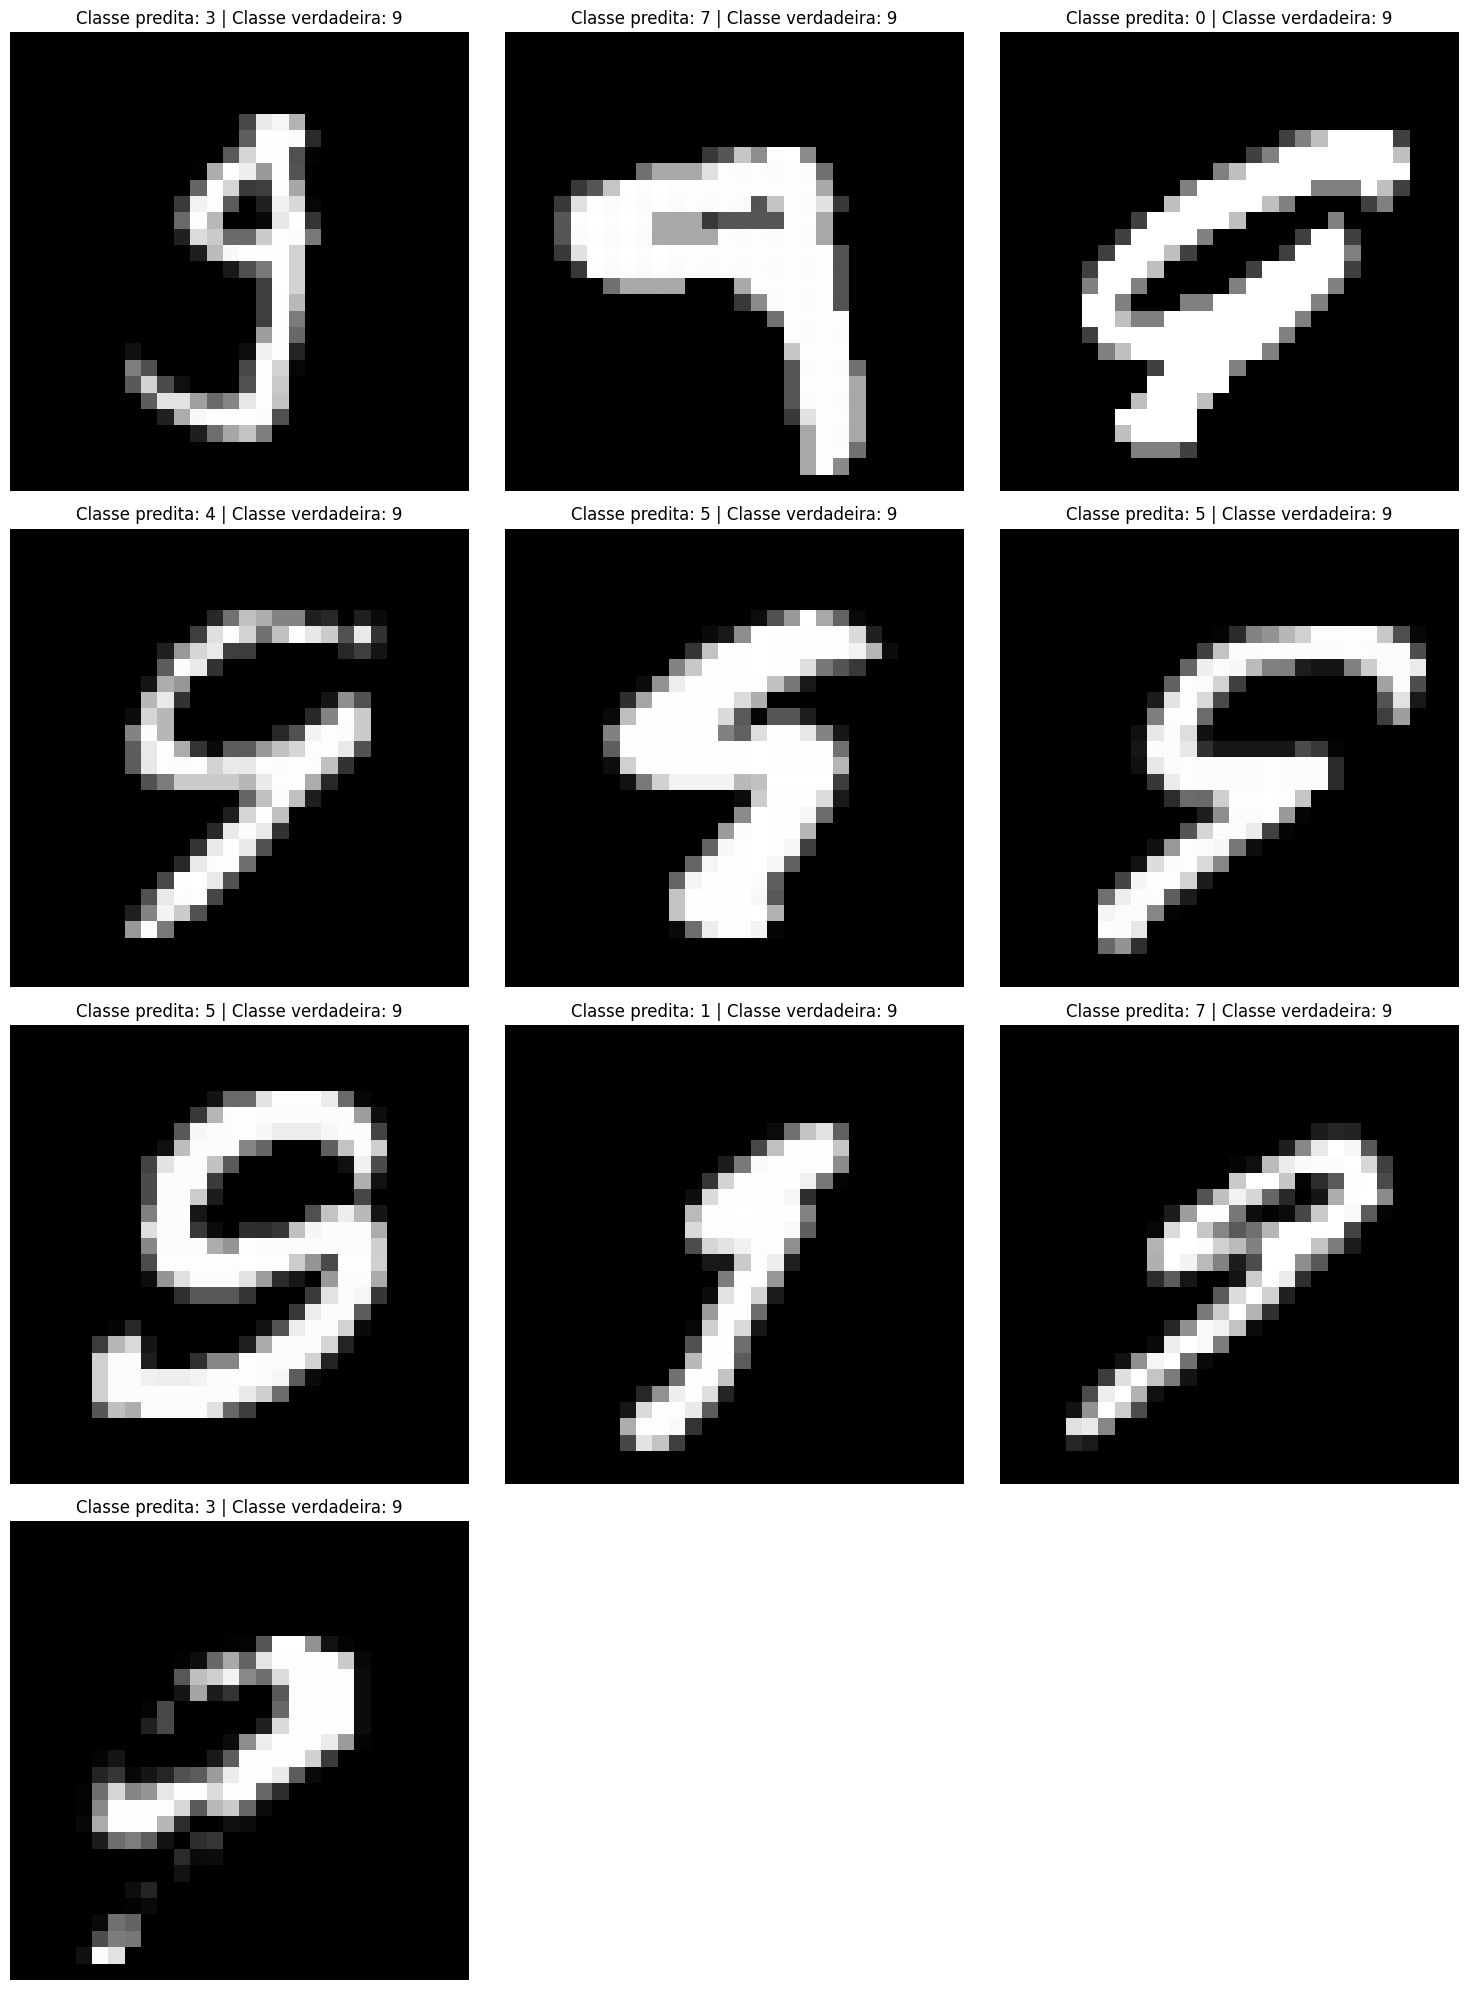

In [86]:
# Vamos escolher imagens da classe 9, já que essa é a classe com o menor f1-score no modelo criado.
images_to_show_1 = X_test[(y_test != best_y_pred) & (y_test == 9)][:10]  # Seleciona as 10 primeiras imagens incorretamente classificadas da classe 9.

# Obtém as classes verdadeiras correspondentes às imagens selecionadas.
real_class_1 = y_test[(y_test != best_y_pred) & (y_test == 9)][:10]

# Obtém as predições feitas pelo modelo para essas mesmas imagens.
predicted_class_1 = best_y_pred[(y_test != best_y_pred) & (y_test == 9)][:10]

# Exibe as imagens selecionadas com suas respectivas classes preditas e verdadeiras.
show_images([image.reshape(-1, 28) for image in images_to_show_1], 
            [f'Classe predita: {predicted_class_1[i]} | Classe verdadeira: {real_class_1[i]}' for i in range(10)])

*Com base nas imagens acima, é evidente que a ambiguidade dos dígitos manuscritos desempenha um papel crucial nas predições incorretas. Como cada indivíduo possui um estilo único de escrita, surgem variações significativas na forma dos números, o que pode gerar traços mal definidos ou estilizados de maneira incomum, dificultando a correta classificação. Por exemplo, o dígito "9" pode facilmente ser confundido com o "3", devido à similaridade na curva superior, ou com o "7", caso a parte inferior esteja pouco delineada. Além disso, muitos dígitos compartilham características visuais semelhantes: a curva inferior do "9", por exemplo, pode ser interpretada como a parte superior de um "5" em imagens com baixa nitidez. Esses desafios são ainda mais acentuados pelo ruído presente nos dados, como linhas apagadas ou formas incompletas, que tornam a distinção dos dígitos ainda mais difícil.*

*Outro fator relevante é a baixa resolução das imagens, que pode comprometer a captura de detalhes importantes. Essa limitação dificulta a diferenciação entre números com formatos semelhantes, como "9" e "5". Adicionalmente, ruídos visuais ou a falta de contraste podem ocultar traços essenciais, prejudicando a interpretação do modelo e contribuindo para predições erradas.*

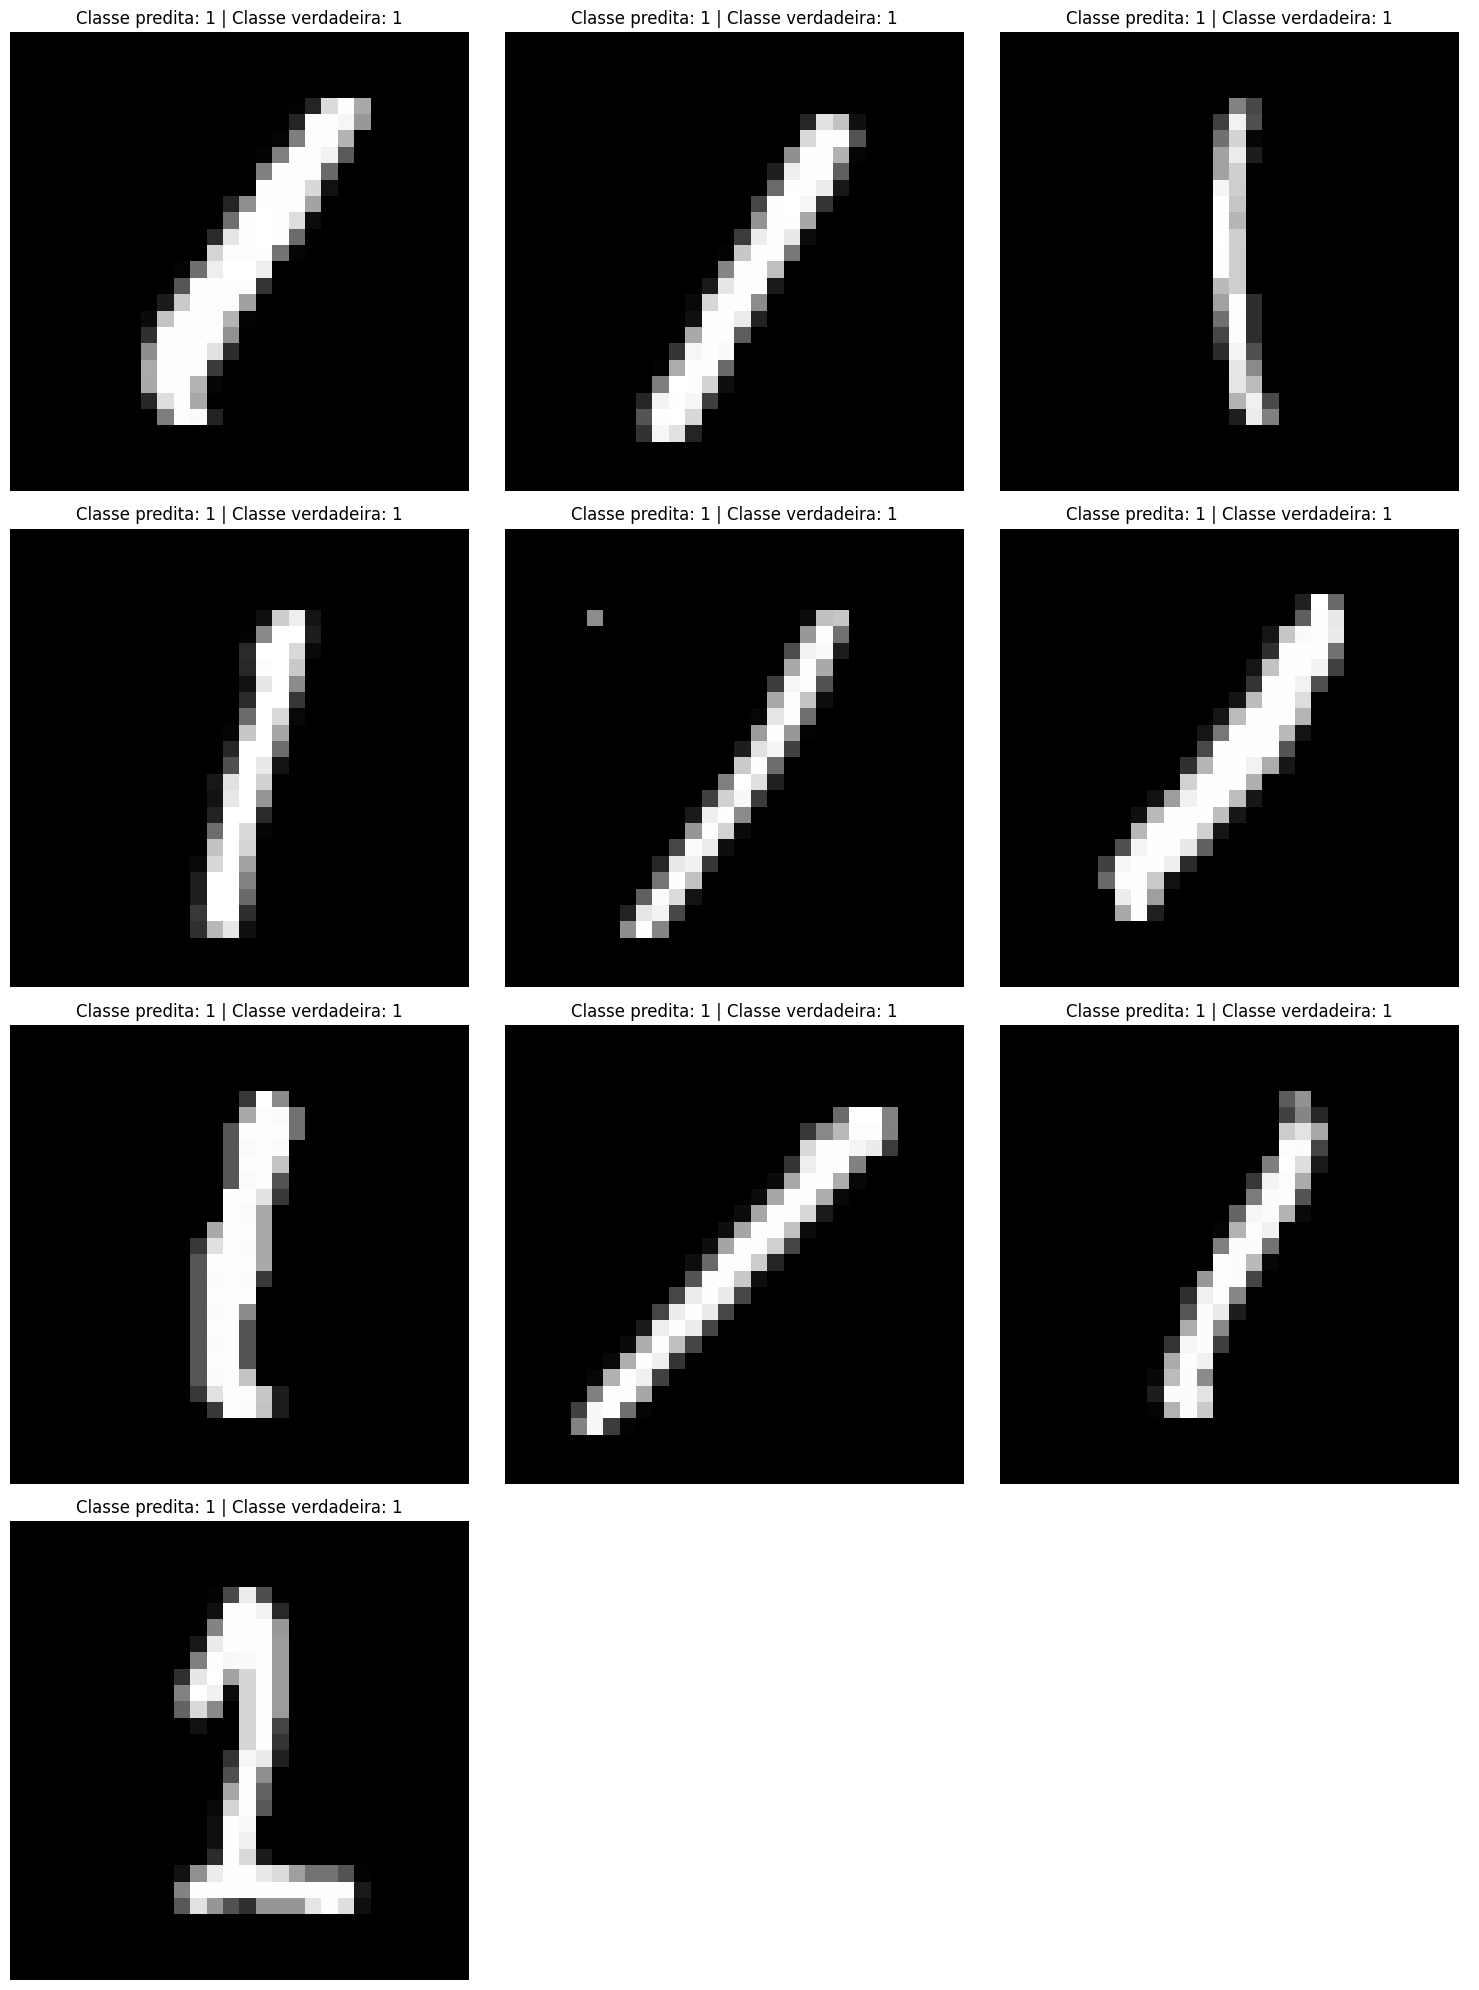

In [88]:
#  Vamos escolher imagens da classe 1, já que essa é a classe com o maior f1-score no modelo criado.
images_to_show_2 = X_test[(y_test == best_y_pred) & (y_test == 1)][:10]  # Seleciona as 10 primeiras imagens incorretamente classificadas da classe 9.

# Obtém as classes verdadeiras correspondentes às imagens selecionadas.
real_class_2 = y_test[(y_test == best_y_pred) & (y_test == 1)][:10]  # Aqui, a classe verdadeira será 1, já que foram corretamente classificadas.

# Obtém as predições feitas pelo modelo para essas mesmas imagens.
predicted_class_2 = best_y_pred[(y_test == best_y_pred) & (y_test == 1)][:10]  # As predições também serão 1, pois são corretas.

# Exibe as imagens selecionadas, junto com os títulos mostrando a classe verdadeira e a classe predita.
show_images([image.reshape(-1, 28) for image in images_to_show_2], 
            [f'Classe predita: {predicted_class_2[i]} | Classe verdadeira: {real_class_2[i]}' for i in range(10)])


*Com base nas imagens acima, podemos dizer que as previsões corretas do dígito "1" podem ser atribuídas a uma combinação de fatores que facilitaram sua identificação pelo modelo. Primeiramente, a simplicidade estrutural do dígito "1" desempenha um papel crucial. Sua forma predominante – uma linha reta ou levemente inclinada – é desprovida de elementos adicionais, como curvas ou traços cruzados, que poderiam introduzir ambiguidades. Essa característica o diferencia nitidamente de outros dígitos, que frequentemente apresentam estruturas mais complexas ou traços sobrepostos.*

*Além disso, as classificações corretas do dígito "1" refletem o funcionamento da função softmax, que converte os scores do modelo em probabilidades relativas, favorecendo a classe com maior proximidade ao padrão observado. No caso do "1", sua estrutura simples e linear apresenta uma vantagem importante: mesmo quando inclinado ou com pequenas distorções, ele ainda mantém maior semelhança com o padrão característico do "1" do que com os traços que definem outros dígitos. Isso permite ao modelo atribuir alta probabilidade à classe correta, mesmo diante de variações estilísticas ou angulações.*

*Por exemplo, dígitos como "7" ou "9" possuem traços adicionais, como linhas horizontais ou curvas, que os tornam visualmente distintos de um traço vertical simples. Assim, mesmo que o "1" apresente variações em sua forma, a ausência de características similares às de outros números contribui para que a softmax favoreça sua classificação correta. Esse comportamento é ainda mais evidente em casos onde o traço do "1" é bem definido e livre de ruídos visuais, reduzindo significativamente as chances de confusão e garantindo maior precisão na identificação.*

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

In [ ]:
# Realiza previsões no conjunto de validação, ajustando a forma dos dados para (n_amostras, 784).
val_pred = best_mlp.predict(X_val.reshape(-1,784))

In [1]:
# Exibe as previsões feitas pelo modelo no conjunto de validação.
val_pred

NameError: name 'val_pred' is not defined

## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!